# Introduction to neural networks
In this notebook we will start with the basics of neural networks for tasks such as regression and classification.

## Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of either TensorFlow or Theano, as well as other frameworks. It was developed with a focus on enabling fast experimentation.



## Exercise 1 (Regression)

The first talk we are going to solve using neural networks is Regression. This is a supervised machine learning task, where the goal is to approximate an underlying function based on data observations. For this exercise the underlying function will be 
$$ f: \mathbb{R} \rightarrow \mathbb{R}$$
$$ f(x) = 10\sin(\pi x^2) + 20 (x-0.5)^ 2 + 15 *x$$

**a)** Construct a dataset by first generating $500$ uniformly distributed $x_i$-samples and then computing $y_i = f(x_i) + 5\eta_i$ where $\eta_i \sim \mathcal{N}(0,1)$. Create a plot with the data-points and the underlying function.


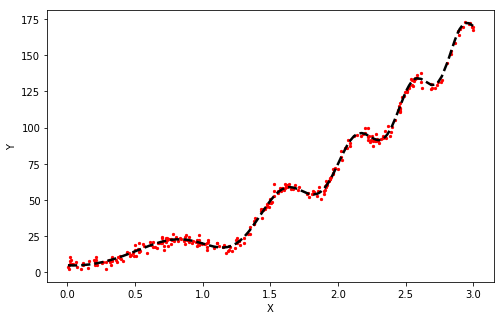

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


X = np.sort(np.random.uniform(0, 3, 300))

Y_true = 10 * np.sin(np.pi * X * X) + 20 * (X - 0.5) ** 2 + 15 * X 

Y = Y_true + np.random.normal(size=X.shape) * 2

plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='red', s=5)
plt.plot(X, Y_true, color='black', linestyle='--', linewidth=2.5)

plt.xlabel('X')
plt.ylabel('Y');

**b)** Split the data set into **training**, and **validation** sets and scale the values for achieving faster convergence. Plot the training points and the testing points with different colors.

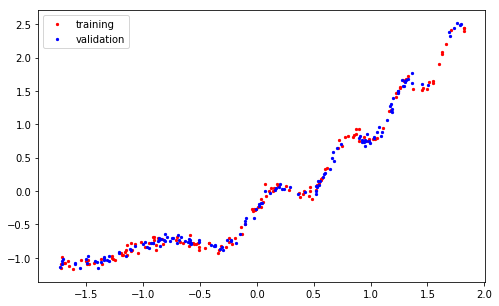

In [2]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

X = scale(X)
Y = scale(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

plt.figure(figsize=(8,5))
plt.scatter(X_train, Y_train, color='red', s=5, label='training')
plt.scatter(X_test, Y_test, color='blue', s=5, label='validation')
plt.legend()

**c)** Create a feed-forward neural network with one hidden layer. Train the network using the training set. Play around with the number of neurons and the number of layers to give more o less complexity to the model.

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam


model = Sequential()

hidden1 = Dense(10, input_dim=1, activation='tanh')
output = Dense(1, activation='linear')

model.add(hidden1)   
model.add(output)

model.compile(optimizer=adam(0.01), loss='mse')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [9]:
h = model.fit(X_train, Y_train, epochs=1000, verbose=1, validation_data=(X_test, Y_test), batch_size=32)

Train on 150 samples, validate on 150 samples
Epoch 1/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.3201 - val_loss: 0.1862
Epoch 2/1000
150/150 [==============================] - 0s 73us/step - loss: 0.1520 - val_loss: 0.1144
Epoch 3/1000
150/150 [==============================] - 0s 67us/step - loss: 0.1137 - val_loss: 0.1296
Epoch 4/1000
150/150 [==============================] - 0s 80us/step - loss: 0.1271 - val_loss: 0.1280
Epoch 5/1000
150/150 [==============================] - 0s 107us/step - loss: 0.1126 - val_loss: 0.1035
Epoch 6/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0938 - val_loss: 0.0909
Epoch 7/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0875 - val_loss: 0.0889
Epoch 8/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0840 - val_loss: 0.0830
Epoch 9/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0766 - val_loss: 0.0772
Epoch 10/1000
150/150 [===

150/150 [==============================] - 0s 93us/step - loss: 0.0238 - val_loss: 0.0223
Epoch 80/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0237 - val_loss: 0.0216
Epoch 81/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0240 - val_loss: 0.0214
Epoch 82/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0236 - val_loss: 0.0217
Epoch 83/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0235 - val_loss: 0.0216
Epoch 84/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0234 - val_loss: 0.0214
Epoch 85/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0240 - val_loss: 0.0213
Epoch 86/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0234 - val_loss: 0.0221
Epoch 87/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0237 - val_loss: 0.0213
Epoch 88/1000
150/150 [==============================] - 0s 100us/step - 

Epoch 157/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0241 - val_loss: 0.0206
Epoch 158/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0243 - val_loss: 0.0212
Epoch 159/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0239 - val_loss: 0.0213
Epoch 160/1000
150/150 [==============================] - 0s 133us/step - loss: 0.0236 - val_loss: 0.0206
Epoch 161/1000
150/150 [==============================] - 0s 160us/step - loss: 0.0234 - val_loss: 0.0206
Epoch 162/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0243 - val_loss: 0.0207
Epoch 163/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0248 - val_loss: 0.0215
Epoch 164/1000
150/150 [==============================] - 0s 127us/step - loss: 0.0248 - val_loss: 0.0218
Epoch 165/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0243 - val_loss: 0.0212
Epoch 166/1000
150/150 [=======================

150/150 [==============================] - 0s 80us/step - loss: 0.0239 - val_loss: 0.0205
Epoch 235/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0230 - val_loss: 0.0204
Epoch 236/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0235 - val_loss: 0.0201
Epoch 237/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0232 - val_loss: 0.0206
Epoch 238/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0231 - val_loss: 0.0202
Epoch 239/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0234 - val_loss: 0.0203
Epoch 240/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0238 - val_loss: 0.0211
Epoch 241/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0231 - val_loss: 0.0209
Epoch 242/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0235 - val_loss: 0.0203
Epoch 243/1000
150/150 [==============================] - 0s 107u

Epoch 311/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0275 - val_loss: 0.0212
Epoch 312/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0240 - val_loss: 0.0238
Epoch 313/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0236 - val_loss: 0.0219
Epoch 314/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0272 - val_loss: 0.0209
Epoch 315/1000
150/150 [==============================] - 0s 120us/step - loss: 0.0257 - val_loss: 0.0209
Epoch 316/1000
150/150 [==============================] - ETA: 0s - loss: 0.022 - 0s 120us/step - loss: 0.0237 - val_loss: 0.0221
Epoch 317/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0249 - val_loss: 0.0209
Epoch 318/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0234 - val_loss: 0.0209
Epoch 319/1000
150/150 [==============================] - 0s 127us/step - loss: 0.0246 - val_loss: 0.0205
Epoch 320/1000
150/150 

150/150 [==============================] - 0s 107us/step - loss: 0.0229 - val_loss: 0.0202
Epoch 389/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0228 - val_loss: 0.0202
Epoch 390/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0231 - val_loss: 0.0203
Epoch 391/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0230 - val_loss: 0.0204
Epoch 392/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0229 - val_loss: 0.0203
Epoch 393/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0230 - val_loss: 0.0201
Epoch 394/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0233 - val_loss: 0.0202
Epoch 395/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0236 - val_loss: 0.0208
Epoch 396/1000
150/150 [==============================] - 0s 120us/step - loss: 0.0231 - val_loss: 0.0202
Epoch 397/1000
150/150 [==============================] - 0s 127

150/150 [==============================] - 0s 100us/step - loss: 0.0231 - val_loss: 0.0203
Epoch 465/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0240 - val_loss: 0.0201
Epoch 466/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0239 - val_loss: 0.0204
Epoch 467/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0227 - val_loss: 0.0202
Epoch 468/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0238 - val_loss: 0.0202
Epoch 469/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0235 - val_loss: 0.0208
Epoch 470/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0233 - val_loss: 0.0205
Epoch 471/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0237 - val_loss: 0.0202
Epoch 472/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0234 - val_loss: 0.0203
Epoch 473/1000
150/150 [==============================] - 0s 107u

150/150 [==============================] - 0s 93us/step - loss: 0.0238 - val_loss: 0.0206
Epoch 542/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0227 - val_loss: 0.0208
Epoch 543/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0237 - val_loss: 0.0202
Epoch 544/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0229 - val_loss: 0.0206
Epoch 545/1000
150/150 [==============================] - 0s 127us/step - loss: 0.0256 - val_loss: 0.0203
Epoch 546/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0229 - val_loss: 0.0216
Epoch 547/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0236 - val_loss: 0.0205
Epoch 548/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0230 - val_loss: 0.0202
Epoch 549/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0232 - val_loss: 0.0204
Epoch 550/1000
150/150 [==============================] - ETA: 0s -

150/150 [==============================] - 0s 73us/step - loss: 0.0231 - val_loss: 0.0203
Epoch 619/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0229 - val_loss: 0.0205
Epoch 620/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0232 - val_loss: 0.0203
Epoch 621/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0233 - val_loss: 0.0202
Epoch 622/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0230 - val_loss: 0.0202
Epoch 623/1000
150/150 [==============================] - 0s 120us/step - loss: 0.0233 - val_loss: 0.0203
Epoch 624/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0232 - val_loss: 0.0208
Epoch 625/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0237 - val_loss: 0.0203
Epoch 626/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0235 - val_loss: 0.0203
Epoch 627/1000
150/150 [==============================] - 0s 93us/

150/150 [==============================] - 0s 87us/step - loss: 0.0234 - val_loss: 0.0207
Epoch 696/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0232 - val_loss: 0.0203
Epoch 697/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0229 - val_loss: 0.0202
Epoch 698/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0234 - val_loss: 0.0203
Epoch 699/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0234 - val_loss: 0.0202
Epoch 700/1000
150/150 [==============================] - ETA: 0s - loss: 0.021 - 0s 100us/step - loss: 0.0245 - val_loss: 0.0206
Epoch 701/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0229 - val_loss: 0.0216
Epoch 702/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0249 - val_loss: 0.0202
Epoch 703/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0237 - val_loss: 0.0207
Epoch 704/1000
150/150 [===================

150/150 [==============================] - 0s 100us/step - loss: 0.0250 - val_loss: 0.0205
Epoch 773/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0237 - val_loss: 0.0209
Epoch 774/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0231 - val_loss: 0.0208
Epoch 775/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0233 - val_loss: 0.0202
Epoch 776/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0231 - val_loss: 0.0203
Epoch 777/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0247 - val_loss: 0.0206
Epoch 778/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0230 - val_loss: 0.0207
Epoch 779/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0236 - val_loss: 0.0202
Epoch 780/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0234 - val_loss: 0.0202
Epoch 781/1000
150/150 [==============================] - 0s 80us/st

150/150 [==============================] - 0s 73us/step - loss: 0.0231 - val_loss: 0.0204
Epoch 850/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0229 - val_loss: 0.0202
Epoch 851/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0230 - val_loss: 0.0203
Epoch 852/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0229 - val_loss: 0.0202
Epoch 853/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0232 - val_loss: 0.0202
Epoch 854/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0229 - val_loss: 0.0203
Epoch 855/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0234 - val_loss: 0.0201
Epoch 856/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0233 - val_loss: 0.0209
Epoch 857/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0230 - val_loss: 0.0201
Epoch 858/1000
150/150 [==============================] - 0s 73us/ste

Epoch 927/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0233 - val_loss: 0.0202
Epoch 928/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0228 - val_loss: 0.0204
Epoch 929/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0235 - val_loss: 0.0203
Epoch 930/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0232 - val_loss: 0.0202
Epoch 931/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0241 - val_loss: 0.0204
Epoch 932/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0235 - val_loss: 0.0208
Epoch 933/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0234 - val_loss: 0.0203
Epoch 934/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0231 - val_loss: 0.0203
Epoch 935/1000
150/150 [==============================] - 0s 107us/step - loss: 0.0241 - val_loss: 0.0204
Epoch 936/1000
150/150 [===========================

**d)** Plot the training and validation error curves. Did the training converge? If not then go back and increase the number of training epochs. Also try different batch sizes.

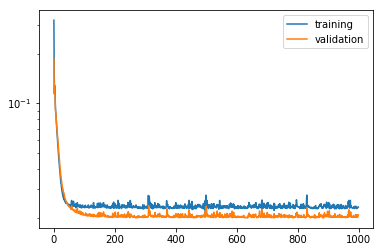

In [10]:
plt.plot(h.history['loss'], label='training')
plt.plot(h.history['val_loss'], label='validation')
plt.yscale('log')
plt.legend();

**e)** Plot the data points and the neural network output to see if the model was able to well approoximate the underlying function. If it is not the case then go back to **b)** and try to solve it.

In [ ]:
plt.scatter(X, Y, color='red', s=5)
plt.plot(sorted(X), model.predict(sorted(X)), color='b', linewidth=3);

## Exercise 2 (Binary classification)

Now will solve a binary classification task. The training data consists of data points $(x_i,y_i)$ with $x_i \in \mathcal{R}^2$ and $y_i \in \lbrace 0, 1\rbrace$. 

**a)** Generate the data using the methods `make_moons` or `make_circles` from the package `sklearn.datasets`. Plot the data points (blue for class 0 and red for class 1). Also split the data set into training and validation set.

In [ ]:
# !! Your code goes here








**b)** Create a neural network using `binary_crossentropy` as loss function and `accuracy` as a metric to evaluate the results and train it using the training set.

In [ ]:
# !! Your code goes here








**d)** Plot the training and validation error curves.

In [ ]:
# !! Your code goes here








**e)** Plot the data points and color the surface according to the probability of belonging to each class. This should make visible the decision area and its uncertainty.

In [ ]:
# !! Your code goes here






